Bir önceki (Training ve Test Data setlerini hazırlama) kısmında hazırlamış olduğumuz Processed_Test_00.. isimli dosyaları kullanarak eğiteceğiz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
def give_Test_engine(Test_no, engine_id):
    "Test_no, Test-set'in sl.no su"
    "engine_id ise Motorun ID'si"
    import pandas as pd
    import numpy as np
    df = pd.read_csv("Processed_Test_00{}.csv".format(Test_no))
    test = df[df['ID'] == engine_id]
    test = test.drop(columns = ['ID'])
    X_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1]
    return X_test, y_test

In [4]:
def give_Train_engine(Train_no, engine_id):
    "Train_no, Train-set'in sl.no su"
    "engine_id ise motorun ID'si"
    import pandas as pd
    import numpy as np
    df = pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    train = df[df['ID'] == engine_id]
    train = train.drop(columns = ['ID'])
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:,-1]
    return X_train, y_train

# Bütün Önişlemden geçmiş (Preprocessed) Dataları İçeri aktaracağız

In [5]:
df1 = pd.read_csv('Processed_Train_001.csv') #Bu kısımlar train olacak
df2 = pd.read_csv('Processed_Train_002.csv')
df3 = pd.read_csv('Processed_Train_003.csv')
df4 = pd.read_csv('Processed_Train_004.csv')

df = pd.concat([df1,df2,df3,df4])
df

,ID,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,249,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,249,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,249,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


Bütün ön işleme alıp bazı sütunları (sensörleri, operationsu vb.) sildiğimiz ve EOL-Cycle yapıp RUL değerini tabloya eklediğimiz dosyaları içeri aktardık. Ardından concat ile bütün hepsini bir araya getirdik


In [6]:
df = df.drop(columns = ['ID'])  #ID'de düştü.
df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,605.33,1516.36,1315.28,404.59,2319.66,46.08,380.16,2388.73,8.4541,372,29.11,17.5234,4
61245,252,643.42,1598.92,1426.77,567.59,2388.47,48.04,535.02,2388.46,8.2221,396,39.38,23.7151,3
61246,253,643.68,1607.72,1430.56,569.04,2388.51,48.24,535.41,2388.48,8.2525,395,39.78,23.8270,2
61247,254,555.77,1381.29,1148.18,199.93,2223.78,42.53,187.92,2388.83,9.0515,337,15.26,9.0774,1


# Özelliklere ve Hedefe Bölme

In [7]:
X = df.iloc[:, 0:-1] #0'dan başlayıp Sensorlerin sonuna kadar
y = df.iloc[:, -1]

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

# Random Forest Regression Modeli (Algoritması) kullanarak Eğitme

In [8]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

Birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek isabetli tahminlerde bulunmaya yarayan bir regresyon modelidir.

In [11]:
y_pred = regressor.predict(X_test)
print('Test Veri Setinde RMSE değeri:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_train = regressor.predict(X_train)
print('Eğitim Veri Setinde RMSE değeri:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

#Ortalama Kare Hatası tahmin edilen sonuçlarınızın gerçek sayıdan ne kadar farklı olduğuna dair size mutlak bir sayı verir.
#RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir.
#Root Mean Squared Error(RMSE)

Test Veri Setinde RMSE değeri: 53.128828057610406
Eğitim Veri Setinde RMSE değeri: 16.74930203832962


# Eğitim Setinin Performansı

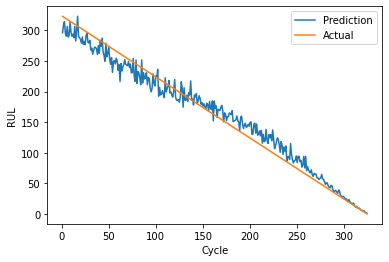

Eğitim Veri Setinde RMSE Değeri:  15.82659938673334


In [16]:
X1,y1 = give_Train_engine(3,37) #Buraya test etmek istediğimiz eğitim datasını ve motor id giriyoruz.
#parantez içerisindeki 3 ve 100 bize, 3:train_no(processed_train),
#100: motor numarası

y_pred_train = regressor.predict(X1)

plt.plot(X1['Cycle'], y_pred_train)
plt.plot(X1['Cycle'], y1)
plt.ylabel('RUL')
plt.xlabel('Cycle')
plt.legend(['Prediction','Actual'], loc = 'upper right')
plt.show()

print('Eğitim Veri Setinde RMSE Değeri: ', np.sqrt(metrics.mean_squared_error(y1, y_pred_train)))

# Hareketli Ortalama (Moving Average)

Eski dataya yani (bizdeki test datasındaki veriler) bazında bakılarak eğitilmiş olan veri seti ile birlikte grafik üzerinde nasıl olduğunun gözlenmesi. Normalde bir varlığın belirli süre boyunca ortalama kapanış fiyatını hesaplayan göstergeye Hareketli Ortalama denmektedir.

In [17]:
def moving_average (window_size, y_pred):
    numbers_series = pd.Series(y_pred)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()
    
    moving_averages_list = moving_averages.tolist()
    y_pred_avg = moving_averages_list[window_size -1:]
    return y_pred_avg

Test Veri Setinde RMSE değeri:  40.40756666318822


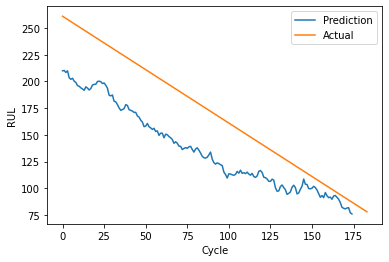

In [22]:
X_test,y_test = give_Test_engine(2,30) #fonksiyon
y_pred = regressor.predict(X_test)

window_size = 10
y_pred = moving_average(window_size, y_pred)

print('Test Veri Setinde RMSE değeri: ',np.sqrt(metrics.mean_squared_error(y_test[0:len(y_pred)], y_pred)))

plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.ylabel('RUL')
plt.xlabel('Cycle')
plt.legend(['Prediction','Actual'])
plt.show()

# Hiperparametre Ayarlaması için Izgara Araması Yapma

**n_estimators:** Daha fazla ağaç var ise , algoritmanın fazla uyması daha az olasıdır. Fazla ağaç kullanıp eğitilirse daha iyi bir tahmin performansı sağlar fakat kodun daha yavaş çalışmasına neden olur. Bu sebeple bu parametreyi arttırmayı denemeliyiz. GridSearchCV yöntemi RandomForestRegression ile kullanılır.

**max_depth:** bu parametre, öğrenilen modellerin karmaşıklığını azaltacak ve aşırı uydurma riskini azaltacaktır.(düşük tutmamız gerekiyor örneğin; 2,3,4)

**min_samples_leaf:**  bu değerleri birden büyük ayarlamamız gerekiyor. max_depth parametresine benzer bir etkiye sahiptir, bu yaprakların her biri bu sayıda numuneye sahip olduğunda dalın bölünmeyi durduracağı anlamına gelir.

In [ ]:
param_grid = {'max_features': ['log2', 'sqt'], 'n_estimators': [100,200,250,350]}
RF = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, scoring = "neg_root_mean_squared_error", n_jobs = -1, cv = 10)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print('Test Verisi RMSE Değeri:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

y_pred_train = RF.predict(X_train)
print('Training Verisi RMSE Değeri:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

In [ ]:
RF = RandomForestRegressor(n_estimators = 350, max_features = 'log2')
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
print('Test Verisi RMSE Değeri:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = RF.predict(X_train)
print('Training Verisi RMSE Değeri:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
